In [1]:
"""
                        ~ Notable fields/methods & Concepts ~

Concepts
 - Probability Mass Function (PMF), Cumulative Distribution Function (CDF)
 - Standard Normal Distribution: Probability Density Function (PDF), KDE, CDF
 - Distributions: Violin plots, Box plots, Histograms
 - Regression: Simple Linear Regression, Multiple Regression, Logistic Regression

statsmodels.formula.api
 -

scipy.stats
 -
"""
import statsmodels.formula.api as smf
import pandas
import numpy as np
from scipy.stats import uniform, norm, binom, iqr, poisson, linregress
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Pmf, Cdf

data_folder = '../../data'
# df_gss = pandas.read_hdf(f'{data_folder}/gss.hdf5','gss')
# df_gss.to_csv('gss.csv',index=False)
df_gss = pandas.read_csv(f'{data_folder}/gss.csv')
df_discount_motors = pandas.read_csv(f'{data_folder}/used_cars_sales.csv')

In [2]:
df_gss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62466 entries, 0 to 62465
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     62466 non-null  int64  
 1   age      62281 non-null  float64
 2   cohort   62282 non-null  float64
 3   sex      62466 non-null  int64  
 4   race     62466 non-null  int64  
 5   educ     62304 non-null  float64
 6   realinc  55499 non-null  float64
 7   gunlaw   40550 non-null  float64
 8   grass    36222 non-null  float64
 9   wtssall  62466 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 4.8 MB


In [3]:
# df_gss[df_gss['educ'].isna()]
df_edu = df_gss['educ']
pmf_edu = Pmf(df_edu)
display(pmf_edu(0))
display(pmf_edu(12))
pmf_edu.sort_values(ascending=False).value_counts(normalize=True).sort_index()

18.0

11.0

0.0     0.002311
1.0     0.000610
2.0     0.002424
3.0     0.003948
4.0     0.004655
5.0     0.006083
6.0     0.013514
7.0     0.013803
8.0     0.038858
9.0     0.031507
10.0    0.045246
11.0    0.062018
12.0    0.307284
13.0    0.086752
14.0    0.112031
15.0    0.045519
16.0    0.127648
17.0    0.028746
18.0    0.033850
19.0    0.012423
20.0    0.020769
Name: , dtype: float64

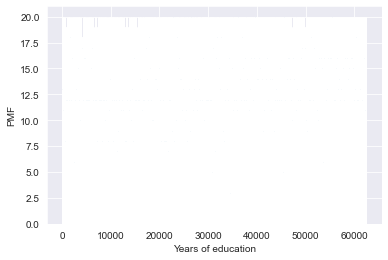

In [4]:
pmf_edu.bar(label='edu')
plt.xlabel('Years of education')
plt.ylabel('PMF')
plt.show()

In [5]:
# simp1 = [1,2,2,3,4]
simp1 = ['a','b','b','c','d']
pmf_s1 = Pmf(simp1)
[pmf_s1('a'), pmf_s1('b')]

[0, 0]

In [6]:
age_count_pct = df_gss['age'].value_counts(normalize=True).sort_index()
age_count_pct

18.0    0.005620
19.0    0.019878
20.0    0.018111
21.0    0.019219
22.0    0.020247
          ...   
85.0    0.002360
86.0    0.001927
87.0    0.001702
88.0    0.001413
89.0    0.003773
Name: age, Length: 72, dtype: float64

In [7]:
# type(age_count_pct)
1-age_count_pct[18:30].sum()

0.7460862863473612

In [8]:
price = df_discount_motors['price'].value_counts().sort_values(ascending=False)\
    .rename_axis('price').rename('count')
len(price)

2114

# Probability Mass Function (PMF)

In [9]:
pmf_fuel = df_discount_motors['fuelType'].value_counts(normalize=True).rename('fuel_type')
pmf_fuel
# pmf_fuel.index

Petrol    0.606560
Hybrid    0.303206
Diesel    0.074651
Other     0.015583
Name: fuel_type, dtype: float64

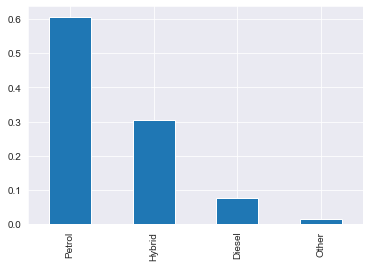

In [10]:
# sns.barplot(data=pmf_fuel,x=pmf_fuel.index)
pmf_fuel.plot(kind='bar')
plt.show()

In [11]:
fuel_counts = df_discount_motors['fuelType'].value_counts()

In [12]:
df_discount_motors['year'].value_counts().rename('count').rename_axis('year').reset_index()

,year,count
0,2017,2019
1,2019,1286
2,2018,1015
3,2016,997
4,2015,525
5,2014,352
6,2013,204
7,2020,128
8,2012,42
9,2011,40


# Petro Sales by Year

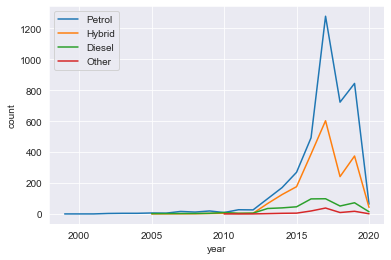

In [13]:
petrol = df_discount_motors['fuelType'] == 'Petrol'
hybrid = df_discount_motors['fuelType'] == 'Hybrid'
diesel = df_discount_motors['fuelType'] == 'Diesel'
other = df_discount_motors['fuelType'] == 'Other'

year = df_discount_motors['year']
petrol_years = df_discount_motors[petrol]['year'].value_counts().rename('count')\
    .rename_axis('year').reset_index()
hybrid_years = df_discount_motors[hybrid]['year'].value_counts().rename('count')\
    .rename_axis('year').reset_index()
diesel_years = df_discount_motors[diesel]['year'].value_counts().rename('count')\
    .rename_axis('year').reset_index()
other_years = df_discount_motors[other]['year'].value_counts().rename('count')\
    .rename_axis('year').reset_index()

# display(petrol_years.sort_values('count',ascending=False).head())
# display(hybrid_years.sort_values('count',ascending=False).head())

sns.lineplot(
    x=petrol_years['year'],y=petrol_years['count'],label='Petrol')

sns.lineplot(
    x=hybrid_years['year'], y=hybrid_years['count'], label='Hybrid')

sns.lineplot(
    x=hybrid_years['year'], y=diesel_years['count'], label='Diesel')

sns.lineplot(
    x=hybrid_years['year'], y=other_years['count'], label='Other')

plt.show()

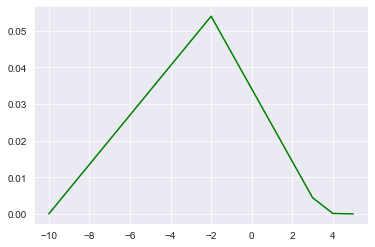

In [14]:
# x = np.random.normal(size=10)
# x = [1,2,3,4,5]
x = [-10,-2,3,4,5]
y = norm(0,1).pdf(x)
plt.plot(x,y,color='green')
plt.show()

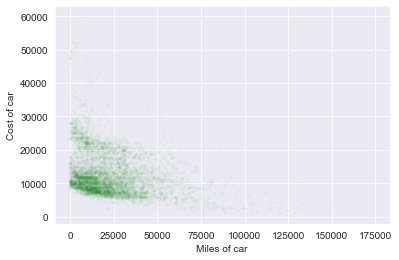

In [15]:
plt.plot(
    df_discount_motors['mileage'],df_discount_motors['price'],'o',
    color='green',alpha=0.02,markersize=2)
plt.xlabel('Miles of car')
plt.ylabel('Cost of car')
plt.show()

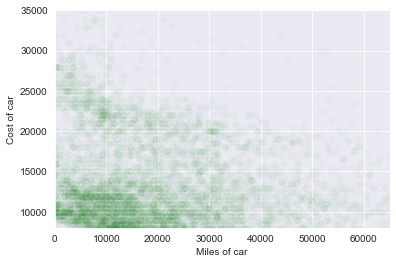

In [16]:
plt.plot(
    df_discount_motors['mileage'],df_discount_motors['price'],'o',
    color='green',alpha=0.02)  # ,markersize=2
plt.xlabel('Miles of car')
plt.ylabel('Cost of car')
# _zoom
plt.axis([0,65000,8000,35000])
plt.show()

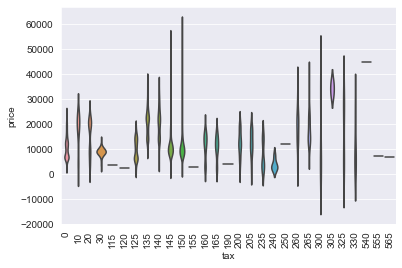

In [17]:
data = df_discount_motors.dropna(subset=['tax','price'])
sns.violinplot(x='tax',y='price',data=data,inner=None)
plt.xticks(rotation=90)
plt.show()

In [18]:
c = df_discount_motors.corr()
c

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.420959,-0.727749,0.283455,-0.020607,-0.045567
price,0.420959,1.000000,-0.297936,0.214498,-0.039910,0.727592
mileage,-0.727749,-0.297936,1.000000,-0.205285,0.044889,0.182615
tax,0.283455,0.214498,-0.205285,1.000000,-0.430292,0.155727
mpg,-0.020607,-0.039910,0.044889,-0.430292,1.000000,-0.106868
engineSize,-0.045567,0.727592,0.182615,0.155727,-0.106868,1.000000


In [19]:
c['price']

year          0.420959
price         1.000000
mileage      -0.297936
tax           0.214498
mpg          -0.039910
engineSize    0.727592
Name: price, dtype: float64

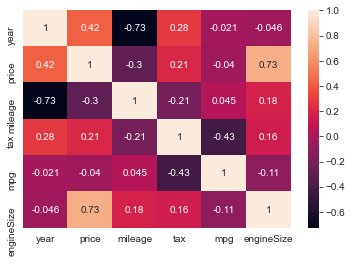

In [20]:
sns.heatmap(c, annot=True)
plt.show()